<h1>Imports</h1>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import csv
from matplotlib import widgets
import pickle
from matplotlib.patches import Patch

%matplotlib ipympl


# x ̈ + 0.085x ̇ − 0.5x + 0.2x3 = γ cos(0.42t).
delta = 0.085
k1 = -0.5
k3 = 0.2
omega = 0.42
Tperiod = 2*np.pi/omega

plot_bifuraction_diagram1_flag = False

def duffing_RHS(t, x, g):
    dxdt = x[1]
    dvdt = -delta * x[1] - k1 * x[0] - k3 * x[0]**3 + g * np.cos(omega * t)
    dxdt = np.array([dxdt, dvdt])
    return dxdt

def RKStep(y, t, RHS, h):
    h2 = 0.5*h
    k1 = RHS(t, y)
    k2 = RHS(t+h2, y+h2*k1)
    k3 = RHS(t+h2, y+h2*k2)
    k4 = RHS(t+h, y+h*k3)
    tnew = t + h
    ynew = y + h*(k1+2*(k2+k3)+k4)/6
    return ynew, tnew

def Stoch_RKStep(y, t, RHS, h, sigma):
    ynew, tnew = RKStep(y, t, RHS, h)
    if sigma>0:
        dW = np.random.normal(size=1)*np.sqrt(h)*sigma
        ynew[1] += dW[0]
    return ynew, tnew

<h1>Bifurcation Diagram</h1>

In [20]:
if plot_bifuraction_diagram1_flag == True:
    # plot the bifurcation digram from Aragwal et al.
    y0 = np.array([1.6,0.0]) # initial condition
    gamma_vals = np.arange(0.1,2.0,0.01)
    Ngamma = np.size(gamma_vals)
    AbsTol = 1.0e-9
    RelTol = 1.0e-9
    Nskip = 50
    Nkeep = 50
    Tskip = Tperiod*Nskip
    Tkeep = Tperiod*Nkeep
    x_diagram_data_bif1 = np.zeros([Ngamma,Nkeep])
    t_store = Tperiod*np.array(range(Nkeep))
    for j, gamma in enumerate(gamma_vals):
        gamma = gamma_vals[j]
        print(gamma)
        sol = solve_ivp(lambda t, x: duffing_RHS(t, x, gamma), \
                        [0.0,Tskip],y0,method = 'RK45', atol = AbsTol,rtol = RelTol)
        x = sol.y[0]
        v = sol.y[1]
        y0 = np.array([x[-1],v[-1]])
        sol = solve_ivp(lambda t, x: duffing_RHS(t, x, gamma), \
                        [0.0,Tskip],y0,t_eval = t_store,method = 'RK45',atol = AbsTol,rtol = RelTol)
        x = sol.y[0]
        v = sol.y[1]
        x_diagram_data_bif1[j,:] = x
        y0 = np.array([x[-1],v[-1]])
    with open('bifurcation_diagram1.csv', 'w', newline='') as file:
        mywriter = csv.writer(file, delimiter=',')
        mywriter.writerows(x_diagram_data_bif1)
else:
    gamma_vals = np.arange(0.1,2.0,0.01)
    Ngamma = np.size(gamma_vals)
    Nskip = 50
    Nkeep = 50
    x_diagram_data_bif1 = np.genfromtxt('bifurcation_diagram1.csv', delimiter=',')
    # read this file
    d = 1

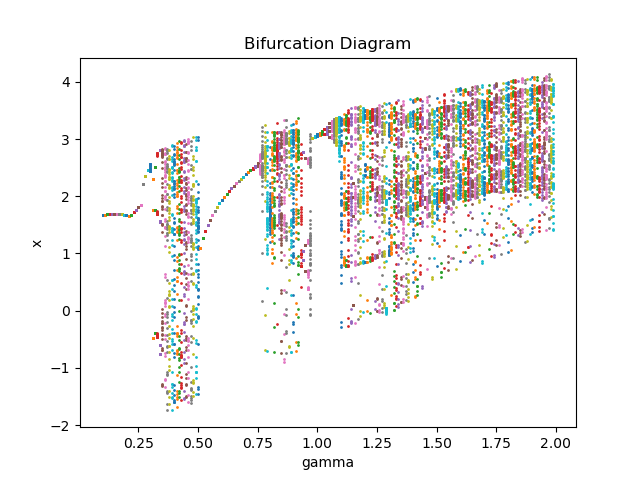

In [21]:
plt.figure()
for j in range(Ngamma):
    plt.scatter(gamma_vals[j]*np.ones(Nkeep),x_diagram_data_bif1[j,:], s=1)
    
plt.xlabel('gamma')
plt.ylabel('x')
plt.title('Bifurcation Diagram')
plt.show()
#plt.savefig('BifurcationDiagramDuffing.pdf')

<h1>New Bifurcation Diagram</h1>

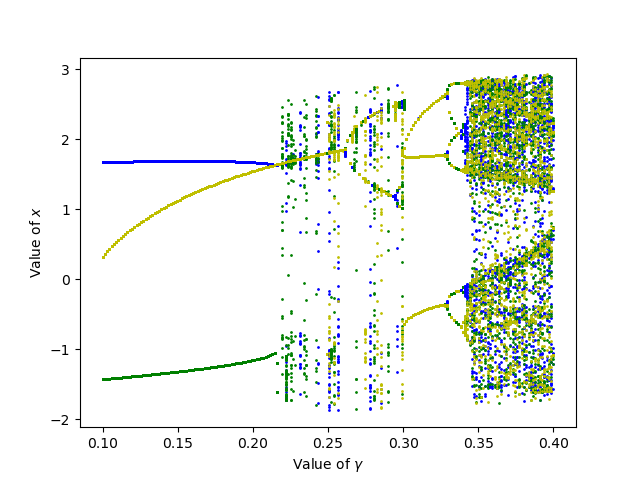

In [22]:
plot_bifuraction_diagram2_flag = False
y0_1 = np.array([1.6,0.0]) # initial condition
y0_2 = np.array([-1.3,0.0])
y0_3 = np.array([1.12, 0.9])
Ngamma = 200
gamma_vals = np.linspace(0.1,0.4,Ngamma)
AbsTol = 1.0e-9
RelTol = 1.0e-9
Nskip = 50
Nkeep = 50
Tskip = Tperiod*Nskip
Tkeep = Tperiod*Nkeep
if plot_bifuraction_diagram2_flag:
    # plot the bifurcation digram from Aragwal et al.
    x_diagram_data_bif2 = np.zeros([3,Ngamma,Nkeep])
    t_store = Tperiod*np.array(range(Nkeep))
    for j, gamma in enumerate(gamma_vals):
        y0_1 = np.array([1.6,0.0]) # initial condition
        y0_2 = np.array([-1.3,0.0])
        y0_3 = np.array([1.12, 0.9])
        
        gamma = gamma_vals[j]
        print(gamma)
        sol = solve_ivp(lambda t, x: duffing_RHS(t, x, gamma), \
                        [0.0,Tskip],y0_1,method = 'RK45', atol = AbsTol,rtol = RelTol)
        x = sol.y[0]
        v = sol.y[1]
        y0_1 = np.array([x[-1],v[-1]])
        sol = solve_ivp(lambda t, x: duffing_RHS(t, x, gamma), \
                        [0.0,Tskip],y0_1,t_eval = t_store,method = 'RK45',atol = AbsTol,rtol = RelTol)
        x = sol.y[0]
        v = sol.y[1]
        y0 = np.array([x[-1],v[-1]])
        x_diagram_data_bif2[0,j,:] = x
        
        sol = solve_ivp(lambda t, x: duffing_RHS(t, x, gamma), \
                        [0.0,Tskip],y0_2,method = 'RK45', atol = AbsTol,rtol = RelTol)
        x = sol.y[0]
        v = sol.y[1]
        y0_2 = np.array([x[-1],v[-1]])
        sol = solve_ivp(lambda t, x: duffing_RHS(t, x, gamma), \
                        [0.0,Tskip],y0_2,t_eval = t_store,method = 'RK45',atol = AbsTol,rtol = RelTol)
        x = sol.y[0]
        v = sol.y[1]
        y0_2 = np.array([x[-1],v[-1]])
        x_diagram_data_bif2[1,j,:] = x
        
        sol = solve_ivp(lambda t, x: duffing_RHS(t, x, gamma), \
                        [0.0,Tskip],y0_3,method = 'RK45', atol = AbsTol,rtol = RelTol)
        x = sol.y[0]
        v = sol.y[1]
        y0_3 = np.array([x[-1],v[-1]])
        sol = solve_ivp(lambda t, x: duffing_RHS(t, x, gamma), \
                        [0.0,Tskip],y0_3,t_eval = t_store,method = 'RK45',atol = AbsTol,rtol = RelTol)
        x = sol.y[0]
        v = sol.y[1]
        y0_3 = np.array([x[-1],v[-1]])
        x_diagram_data_bif2[2,j,:] = x
        
    np.save('new_bifdata.npy', x_diagram_data_bif2)
else:
    x_diagram_data_bif2 = np.load('./new_bifdata.npy')

plt.close()
fig, ax = plt.subplots()

legendflag = True
for j in range(Ngamma):
    plt.scatter(gamma_vals[j]*np.ones(Nkeep),x_diagram_data_bif2[0,j,:], s=1, c='b', label = None)
    plt.scatter(gamma_vals[j]*np.ones(Nkeep),x_diagram_data_bif2[1,j,:], s=1, c='g', label = None)
    plt.scatter(gamma_vals[j]*np.ones(Nkeep),x_diagram_data_bif2[2,j,:], s=1, c='y', label = None)
    
plt.xlabel('Value of $\gamma$')
plt.ylabel('Value of $x$')
#plt.title('Bifurcation Diagram', fontsize=20)
#plt.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
#plt.savefig('../Notebooks/Plots/Bifurcation_Diagram.pdf', format='pdf')
plt.show()


<h1>Finding Other Attractors</h1>
<p>Here, we will search for additional attractors along the regions of the graph that show attractor behavior by varying the starting positions. 

In [25]:
plot_bif_diag_2 = False

In [26]:
x0s = np.arange(1, 3, .04).reshape(-1, 1)
num_vals = x0s.shape[0]
y0s = np.concatenate((x0s, np.zeros(shape=x0s.shape)), axis=1)
gamma_vals = np.arange(0.1,0.4,0.005)
Ngamma1 = np.size(gamma_vals)
AbsTol = 1.0e-9
RelTol = 1.0e-9
Nskip = 50
Nkeep = 50
Tskip = Tperiod*Nskip
Tkeep = Tperiod*Nkeep
x_diagram_data_2 = np.zeros([num_vals, Ngamma1, Nkeep])
t_store = Tperiod*np.array(range(Nkeep))
if plot_bif_diag_2:
    for i, startvalue in enumerate(y0s):
        print(startvalue)
        for j, gamma in enumerate(gamma_vals):
            sol = solve_ivp(lambda t, x: duffing_RHS(t, x, gamma), \
                        [0.0,Tskip], startvalue,method = 'RK45', atol = AbsTol,rtol = RelTol)
            x = sol.y[0]
            v = sol.y[1]
            startvalue = np.array([x[-1],v[-1]])
            sol = solve_ivp(lambda t, x: duffing_RHS(t, x, gamma), \
                        [0.0,Tskip],startvalue,t_eval = t_store,method = 'RK45',atol = AbsTol,rtol = RelTol)
            x = sol.y[0]
            v = sol.y[1]
            x_diagram_data_2[i,j,:] = x
    np.save('./x_diagram_data_2', x_diagram_data_2)
else: 
    x_diagram_data_2 = np.load('./x_diagram_data_2.npy', allow_pickle = True)

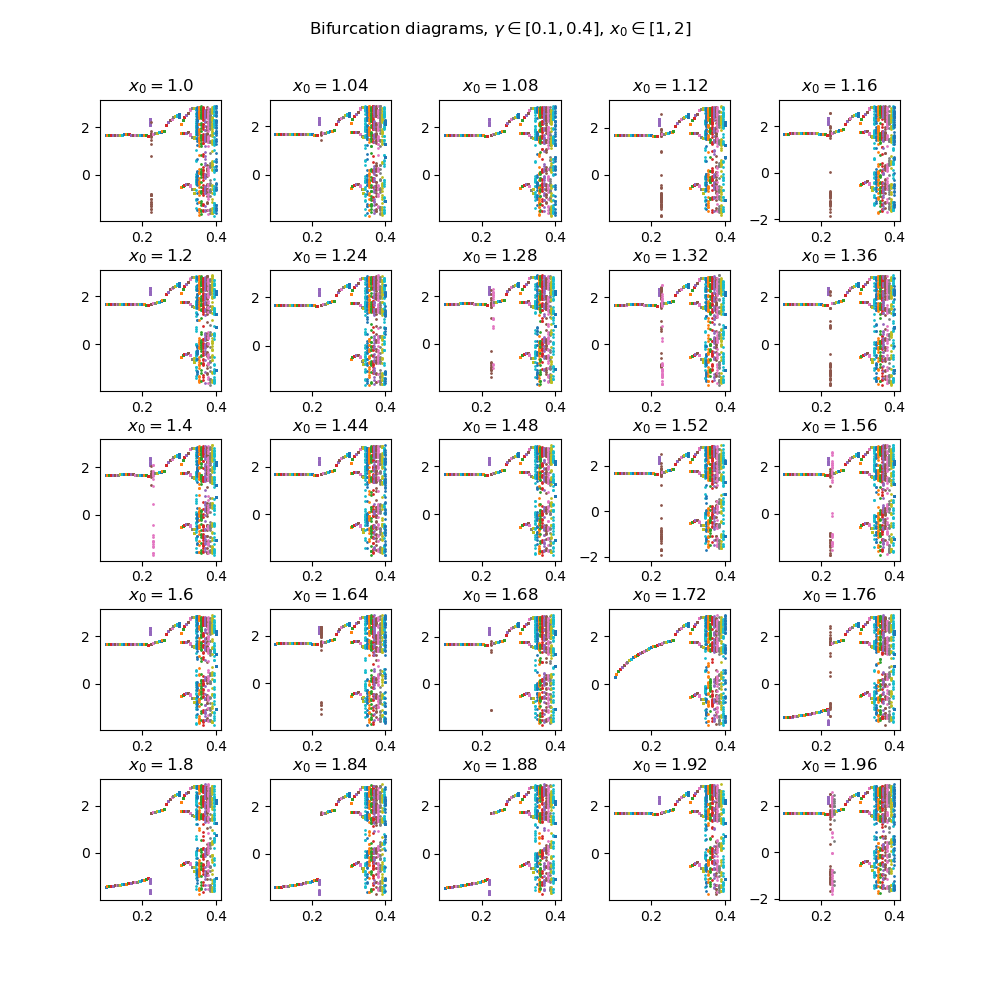

In [27]:
plt.close()
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        for k in range(Ngamma1):
            axs[i, j].scatter(gamma_vals[k]*np.ones(Nkeep),x_diagram_data_2[i*10+j*2, k,:], s=1)
            caption = str(np.round(y0s[i*5+j, 0], 2))
            axs[i, j].set_title(f'$x_0 = {caption}$')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
fig.suptitle('Bifurcation diagrams, $\gamma\in[0.1, 0.4]$, $x_0\in[1, 2]$')
plt.show()
#We wish to overlay the plots for x0=1.0, x0=1.72, x0=1.84

In [28]:
def attractorCurve(y0, gamma, myRKStep=False):
    if myRKStep:
        #don't do shit
        steps_per_period = 500
        dt = Tperiod/steps_per_period
        period_skip = 50
        period_keep = 50
        y_coords = np.zeros((steps_per_period*period_keep, 2))
        y = y0 
        for n in range(period_skip):
            t = 0
            for j in range(steps_per_period):
                y,t = Stoch_RKStep(y,t,lambda t, y: duffing_RHS(t, y, gamma),dt,0)

        for n in range(period_keep):
            t = 0
            for j in range(steps_per_period):
                y,t = Stoch_RKStep(y,t,lambda t, y: duffing_RHS(t, y, gamma),dt,0)
                y_coords[steps_per_period*n+j,:] = y
        print(y_coords)
        return y_coords
    else:
        t = np.linspace(0,20, 100)
        Nskip = 100
        Nkeep = 5
        Tskip = Tperiod*Nskip
        Tkeep = Tperiod*Nkeep
        vals_skip = solve_ivp(lambda t, x: duffing_RHS(t, x, gamma), 
                              [0.0, Tskip], y0, method = 'RK45', atol = AbsTol, rtol = RelTol)
        first_keep_y0 = vals_skip['y'][:,-1]
        vals_keep = solve_ivp(lambda t, x: duffing_RHS(t, x, gamma), 
                              [0.0, Tkeep], first_keep_y0, method = 'RK45', atol = AbsTol, rtol = RelTol)
        return vals_keep['y']

[[1.12447934 1.13164799 1.20450072 ... 0.95493988 1.03902113 1.12447934]
 [0.90830824 0.91106327 0.93757442 ... 0.83656769 0.87363323 0.90830824]]


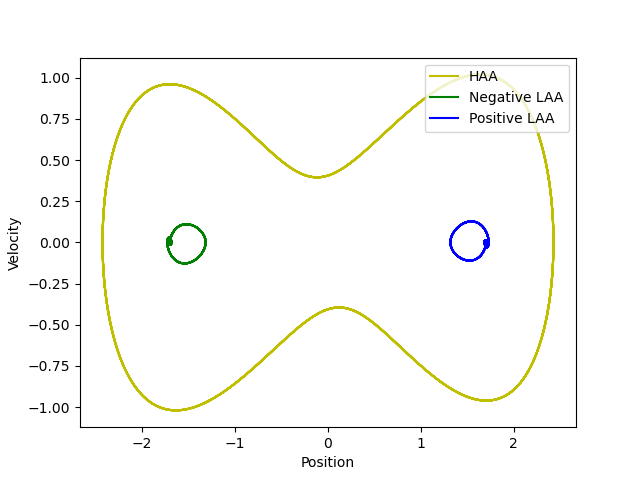

In [29]:
attractor_curve_1 = attractorCurve([2.5, 0], 0.15, False)
print(attractor_curve_1)
attractor_curve_2 = attractorCurve([2.75, 0], 0.15)
attractor_curve_3 = attractorCurve([3.0, 0], 0.15)

plt.close()
plt.figure()
plt.plot(attractor_curve_1[0], attractor_curve_1[1], 'y', label = 'HAA')
plt.plot(attractor_curve_2[0], attractor_curve_2[1], 'g', label = 'Negative LAA')
plt.plot(attractor_curve_3[0], attractor_curve_3[1], 'b', label = 'Positive LAA')
plt.xlabel("Position")
plt.ylabel("Velocity")
plt.legend(loc='upper right')
plt.savefig('../Notebooks/Plots/Attracting_Cycles.pdf', format='pdf')
plt.show()


<h1>Visualisation of Final Behavior</h1>
<p>Here, we wish to see a plot of the solution to the initial value problem with sliders to determine the start value and value of $\gamma$.</p>

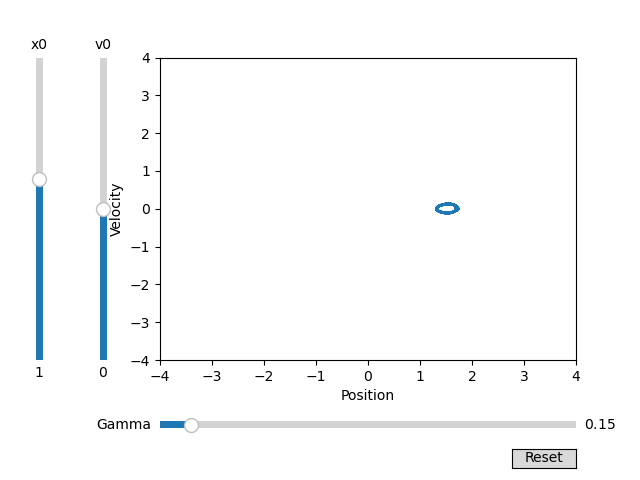

In [30]:
from matplotlib.widgets import Slider, Button

#our function to plot the curves is attractorCurve(y0, gamma)

init_x0 = 1
init_v0 = 0
init_gamma = 0.15

acfig, acax = plt.subplots()
acax.set_xlim(-4, 4)
acax.set_ylim(-4, 4)
init_ac = attractorCurve([init_x0, init_v0], init_gamma)
line, = acax.plot(init_ac[0], init_ac[1], lw=2)
acax.set_xlabel('Position')
acax.set_ylabel('Velocity')
acfig.subplots_adjust(left=0.25, bottom=0.25)

ax_gamma = acfig.add_axes([0.25, 0.1, 0.65, 0.03])
gamma_slider = Slider(
    ax = ax_gamma,
    label = 'Gamma',
    valmin = 0.0,
    valmax = 2.0,
    valinit = init_gamma
)

ax_x0 = acfig.add_axes([0.05, 0.25, 0.0225, 0.63])
x0_slider = Slider(
    ax = ax_x0,
    label = 'x0',
    valmin = -2, 
    valmax = 3,
    valinit = init_x0,
    orientation = 'vertical'
)

ax_v0 = acfig.add_axes([0.15, 0.25, 0.0225, 0.63])
v0_slider = Slider(
    ax = ax_v0,
    label = 'v0',
    valmin = -2, 
    valmax = 2,
    valinit = init_v0,
    orientation = 'vertical'
)

def update(val):
    new_ac = attractorCurve([x0_slider.val, v0_slider.val], gamma_slider.val)
    line.set_xdata(new_ac[0])
    line.set_ydata(new_ac[1])
    acfig.canvas.draw_idle()

gamma_slider.on_changed(update)
x0_slider.on_changed(update)
v0_slider.on_changed(update)

resetax = acfig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    x0_slider.reset()
    v0_slider.reset()
    gamma_slider.reset()
button.on_clicked(reset)

plt.show()

<h1>Implementing Newton's Method</h1>
Here, we wish to better understand the different attractors of the system by using Newton's Method. 

In [31]:
def OnePeriodMap(yi, RHS, Tper, AbsTol, RelTol):
    sol = solve_ivp(RHS, [0.0, Tper], yi, method = 'RK45',
                    t_eval = [0, Tper], atol = AbsTol, rtol = RelTol)
    return sol.y[0][-1], sol.y[1][-1]

def find_periodic_attractor(y_iguess, RHS, Tper, tol, printflag=False):
    AbsTol = 1.0e-12
    RelTol = 1.0e-12
    h = 1.0e-6
    G0, G1 = OnePeriodMap(y_iguess, RHS, Tper, AbsTol, RelTol)
    res = np.linalg.norm(y_iguess - np.array([G0, G1]))
    itermax = 20
    J = np.zeros((2, 2)) #Jacobian
    y0 = y_iguess[0]
    y1 = y_iguess[1]
    iter = 0
    if printflag:
        print(f'iter: {iter}, res: {res}')
    while res > tol and iter < itermax:
        #first we must compute the jacobian matrix
        #perturb the x direction
        G0_shift0, G1_shift0 = OnePeriodMap([y0+h, y1],RHS,Tper,AbsTol,RelTol)
        #perturb the v direction 
        G0_shift1, G1_shift1 = OnePeriodMap([y0, y1+h],RHS,Tper,AbsTol,RelTol)
        J[0,0] = 1-(G0_shift0-G0)/h
        J[0,1] = -(G0_shift1-G0)/h
        J[1,0] = -(G1_shift0-G1)/h
        J[1,1] = 1-(G1_shift1-G1)/h

        ynew = [y0, y1] - np.linalg.solve(J, np.array([y0, y1])-np.array([G0, G1]))
        res = np.linalg.norm([y0, y1]-ynew)
        y0 = ynew[0]
        y1 = ynew[1]
        G0, G1 = OnePeriodMap(ynew, RHS, Tper, AbsTol, RelTol)
        iter += 1
        if printflag:
            print(f'iter: {iter}, res: {res}')
    return [y0, y1]
    

We observe that Newton's method doesn't converge for arbitrary start values, only for ones selected fairly close to the attracting cycle. 

In [32]:
find_periodic_attractor([0.5, 0.25], lambda t, x: duffing_RHS(t, x, 0.15), Tperiod, 1.0e-9, printflag=True)

iter: 0, res: 0.8088087363407794
iter: 1, res: 0.8539945828849379
iter: 2, res: 0.07993335885638989
iter: 3, res: 0.0033245798017931165
iter: 4, res: 1.7105626313835823e-05
iter: 5, res: 7.436409599467377e-11


[1.1244793491980904, 0.9083082471031694]

Here, we're ensuring that we do actually approach a period 1 attractor

Attractor based on integrating the ODE: 1.6907224333903328, -0.017285507621856187


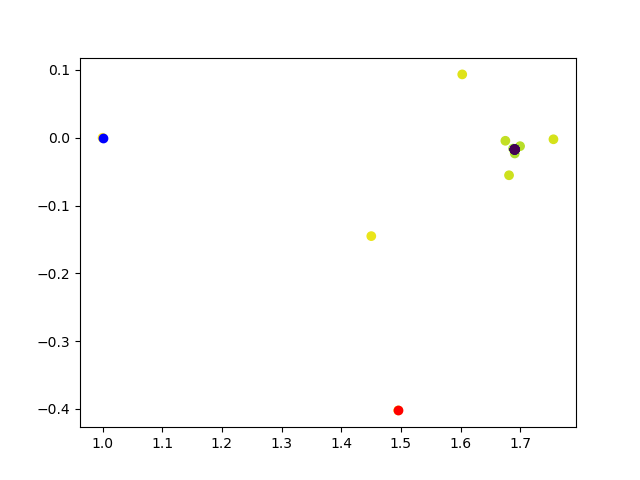

In [33]:
Nperiods = 100
Tperiod = 2*np.pi/omega 
Tmax = Nperiods*Tperiod
t_store = np.arange(0.0, Tmax, Tperiod)
x0 = [1, 0]
sol = solve_ivp(lambda t, x: duffing_RHS(t, x, 0.15), [0.0, Tmax], x0,
                method='RK45', t_eval = t_store, atol = 1.0e-12, rtol = 1.0e-12)
plt.figure()
t = np.exp(-np.linspace(0, 1, len(sol.y[0])))
plt.scatter(sol.y[0], sol.y[1], c=t)
plt.scatter(sol.y[0][0], sol.y[1][0], c='b')
second_val = OnePeriodMap(x0, lambda t, x: duffing_RHS(t, x, 0.15), Tperiod, 1.0e-12, 1.0e-12)
plt.scatter(second_val[0], second_val[1], c='r')
print(f'Attractor based on integrating the ODE: {sol.y[0][-1]}, {sol.y[1][-1]}')

<h1>Understanding the Attractors for $\gamma=0.15$</h1>
<p>We understand from the bifurcation diagram and from the interactive plot that the system has three attracting cycles at $\gamma=0.15$. Below, we visualize the three attractors.</p>

iter: 0, res: 0.01673235913905124
iter: 1, res: 0.011493102492926923
iter: 2, res: 0.00014698188466595862
iter: 3, res: 1.9644169452831802e-08
iter: 4, res: 7.012005498302777e-15
iter: 0, res: 0.014492050154472918
iter: 1, res: 0.010649855288176868
iter: 2, res: 6.493038081390305e-05
iter: 3, res: 1.8718622933202052e-09
iter: 4, res: 1.1821042712943352e-15
iter: 0, res: 0.16717782500418832
iter: 1, res: 0.10804988343855586
iter: 2, res: 0.0014284349447126576
iter: 3, res: 3.411358274713287e-05
iter: 4, res: 6.129849305665727e-11
{0: [-1.32122962719728, 0.01795508995242529], 1: [1.6907224333903361, -0.01728550762184659], 2: [1.124479349198112, 0.9083082471031779]}


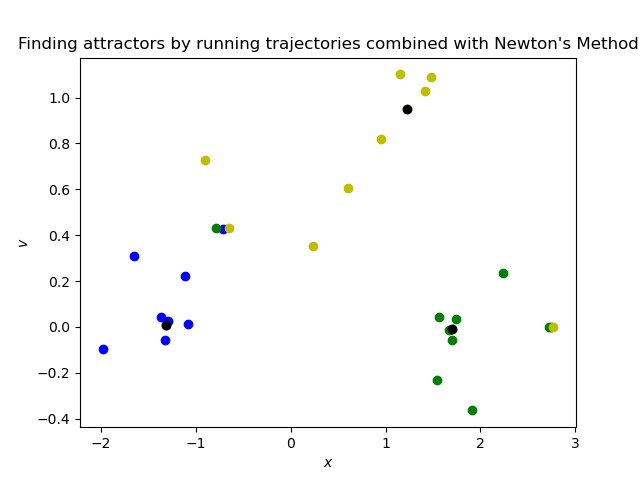

In [34]:
start_points = [[2.75, 0], [2.7272, 0], [2.7719, 0]] 
colormaps = ['b', 'g', 'y']
#the first one is the small negative attractor, second one is small positive
#third one is the larger attractor
Nperiods = 10
Tperiod = 2*np.pi/omega 
Tmax = Nperiods*Tperiod
t_store = np.arange(0.0, Tmax, Tperiod)
sol = {}
attractors = {}
for index, x0 in enumerate(start_points):
    sol[index] = solve_ivp(lambda t, x: duffing_RHS(t, x, 0.15), [0.0, Tmax], x0,
                method='RK45', t_eval = t_store, atol = 1.0e-12, rtol = 1.0e-12).y
    attractors[index] = find_periodic_attractor([sol[index][0,-1], sol[index][1,-1]], 
                                                lambda t, x: duffing_RHS(t, x, 0.15), 
                                                Tperiod, 1.0e-9, printflag = True)
plt.close()
plt.figure()
for index in sol:
    plt.scatter(sol[index][0], sol[index][1], c=colormaps[index])
    plt.scatter(sol[index][0,-1], sol[index][1,-1],c='k')
print(attractors)
plt.xlabel('$x$')
plt.ylabel('$v$')
plt.title('Finding attractors by running trajectories combined with Newton\'s Method')
plt.show()
    

<h1>Basins of Attraction</h1><p>Now that we've demonstrated the success of solving the differential equation up to a point combined with Newton's method after getting close enough, we can use this to create a plot of the basins of attraction of the three points.</p>

In [35]:
def attractor(x, y, pf = False):
    Nperiods = 50
    Tperiod = 2*np.pi/omega 
    Tmax = Nperiods*Tperiod
    t_store = np.arange(0.0, Tmax, Tperiod)
    x0 = np.array([x, y])
    solution = solve_ivp(lambda t, x: duffing_RHS(t, x, 0.15), [0.0, Tmax], x0,
                         method='RK45', t_eval = t_store, atol = 1.0e-12, rtol = 1.0e-12).y
    approaches = find_periodic_attractor([solution[0,-1], solution[1,-1]], 
                                                lambda t, x: duffing_RHS(t, x, 0.15), 
                                                Tperiod, 1.0e-9, printflag = pf)
    return approaches
#the first one is yellow in the basin, second one is red, third one is blue


In [36]:
generate_basin_points_flag = False

numxpoints = 200
numypoints = 200
netpoints = numxpoints*numypoints
xaxis = np.linspace(0, 1, numxpoints)
vaxis = np.linspace(-1, 0, numypoints)
points = {}
if generate_basin_points_flag:
    counter = 0
    for x in xaxis:
        for v in vaxis:
            counter += 1
            attractorpoint = attractor(x, v)
            color = ''
            atsum = np.sum(attractorpoint)
            if atsum<0:
                points[(x, v)] = 'nlaa' 
                #color = 'b'
            elif atsum < 2:
                points[(x, v)] = 'plaa'
                #color = 'r'
            else:
                points[(x, v)] = 'haa'
                #color = 'y'
            print(f'{np.around(100*counter/netpoints, 2)}% Complete'+' '*10, end="\r")
    with open('basins_gamma015_18Jul_zoomed.pkl', 'wb') as fp:
        pickle.dump(points, fp)
        print('Dictionary saved successfully to file')
else:
    with open('basins_gamma015_18Jul.pkl', 'rb') as fp:
        points = pickle.load(fp)
        print('Dictionary loaded successfully from file')

Dictionary loaded successfully from file


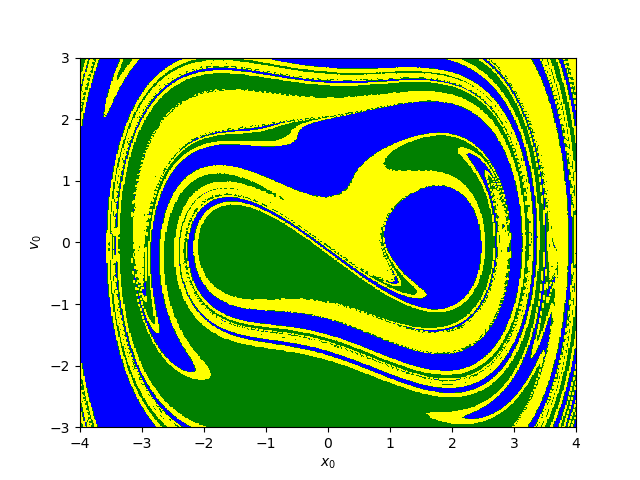

In [37]:
plt.rcParams['savefig.dpi'] = 300

plt.close()
fig, ax = plt.subplots()

x0_raw = np.genfromtxt('../Notebooks/basins/x0.csv', delimiter=',')
v0_raw = np.genfromtxt('../Notebooks/basins/v0.csv', delimiter=',')
basins = np.genfromtxt('../Notebooks/basins/basin.csv', delimiter=',')
x0_basins, v0_basins = np.meshgrid(x0_raw, v0_raw)
basins = ax.contourf(x0_basins, v0_basins, basins, [-.5, 0.5, 1.5, 2.5], colors = ['blue', 'green', 'yellow'])
ax.set_xlabel('$x_0$')
ax.set_ylabel('$v_0$')


plt.savefig('../Notebooks/Plots/Basins_of_attraction.pdf', format='pdf')
plt.show()